# Steps to explain ML models with SHAP

## Load data

In [31]:
import pandas as pd

path = '../../../data/house_perth/output/ml_simple.csv'
df = pd.read_csv(path, index_col=0)
df

,Price,Bedrooms,Bathrooms,Garage,Build Year,Floor Area
ADDRESS,,,,,,
1 Datchet Turn,270000,3,2,2.0,2011.0,109
1 McKenzie Corner,470000,4,2,2.0,2005.0,279
...,...,...,...,...,...,...
93 Centennial Avenue,350000,4,2,2.0,2005.0,177
98 Centennial Avenue,441000,4,2,2.0,2004.0,195


## Feature selection

In [32]:
target = 'Price'

y = df[target]
X = df.drop(columns=target)

## Modelling

In [38]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X,y)

DecisionTreeRegressor()

In [39]:
model.score(X,y)

0.9746449876358452

## SHAP

### Explainer

In [42]:
import shap
explainer = shap.TreeExplainer(model)

### SHAP values

In [45]:
shap_values = explainer.shap_values(X)
shap_values

array([[-2.68472551e+04, -7.24332789e+01, -2.37284020e+03,
        -1.65591174e+04, -7.08209030e+04],
       [ 3.87922364e+03, -1.96098856e+02,  6.99106616e+02,
        -1.09840888e+04,  8.99293084e+04],
       [ 1.41107465e+04, -1.20480859e+03,  8.50206471e+02,
         2.28473586e+04,  2.17239480e+04],
       ...,
       [ 7.97322128e+03, -7.24332789e+01, -8.11904533e+02,
         1.72040515e+04, -4.96548398e+03],
       [ 5.48623422e+03, -1.96098856e+02, -1.34948686e+03,
        -5.13605043e+03, -3.54771471e+04],
       [ 4.26312750e+03, -7.38562092e+01,  1.48995515e+03,
         1.74994089e+04,  3.11488157e+04]])

### Plots

#### Summary: Bar

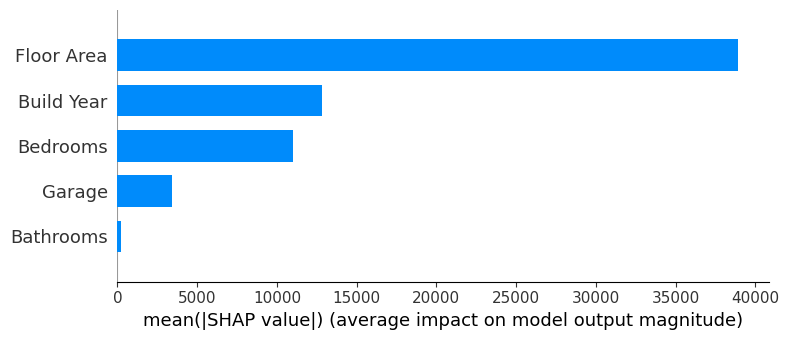

In [46]:
shap.summary_plot(shap_values, X, plot_type='bar')

#### Summary: Dot

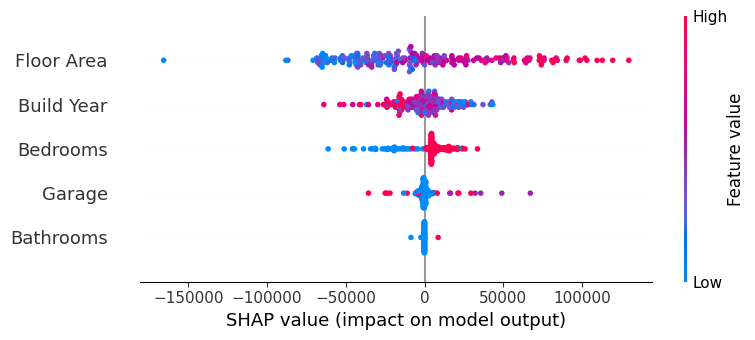

In [47]:
shap.summary_plot(shap_values, X, plot_type='dot')

#### Force

In [50]:
expected_value = explainer.expected_value
expected_value

array([386672.54901961])

In [51]:
shap.initjs() # Required for Jupyter Notebook; only once
shap.plots.force(expected_value, shap_values, X)

#### Decision

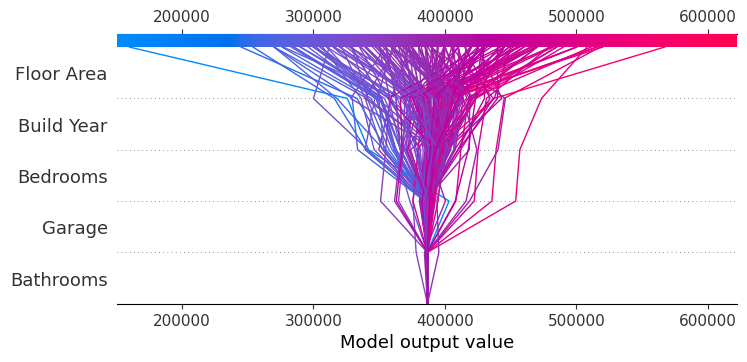

In [52]:
shap.decision_plot(expected_value, shap_values, X)

#### Force Individual

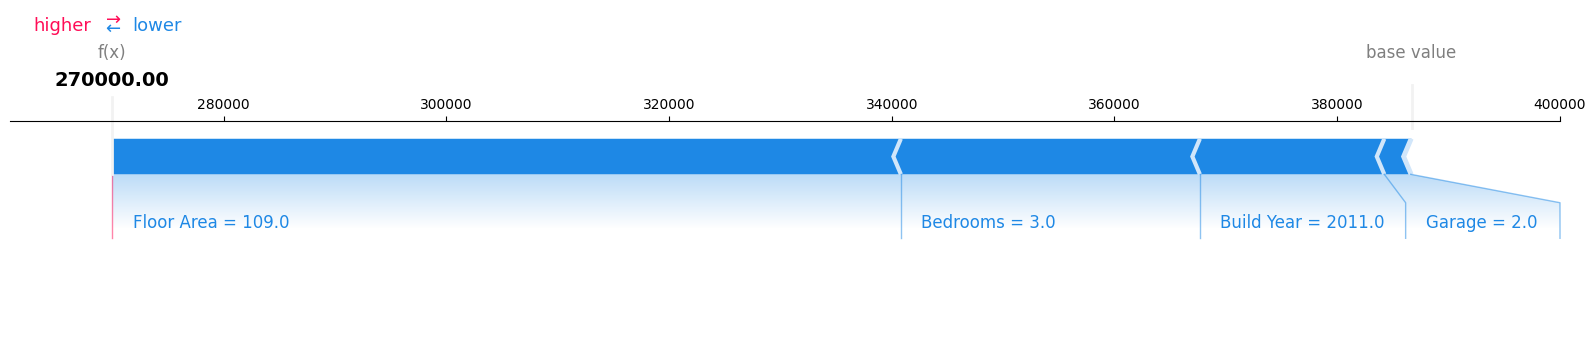

In [60]:
row = 0
shap.force_plot(expected_value, shap_values[row], X.iloc[row], matplotlib=True)

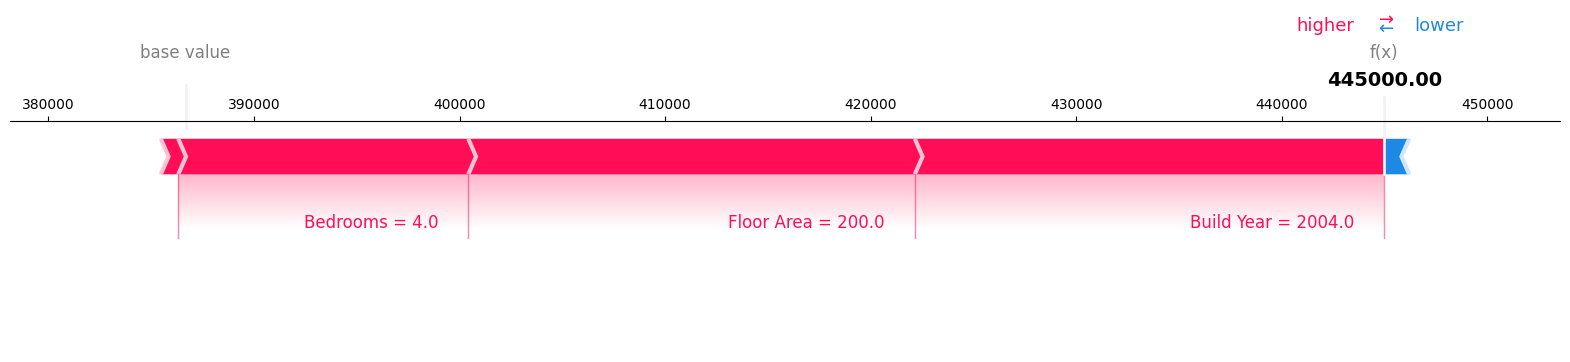

In [61]:
row = 2
shap.force_plot(expected_value, shap_values[row], X.iloc[row], matplotlib=True)

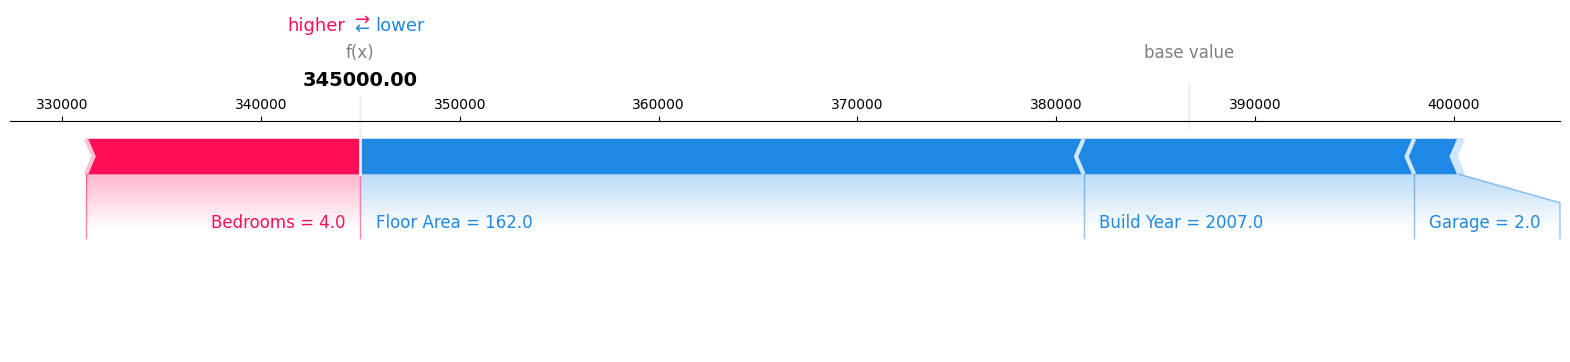

In [62]:
row = 14
shap.force_plot(expected_value, shap_values[row], X.iloc[row], matplotlib=True)